# Questão 1

A tabela abaixo apresenta a taxa de geração de $CO_{2}$ e a taxa de consumo de oxigênio em vários tempos, durante o processo de fermentação de *Penicillium chrysogenum*.

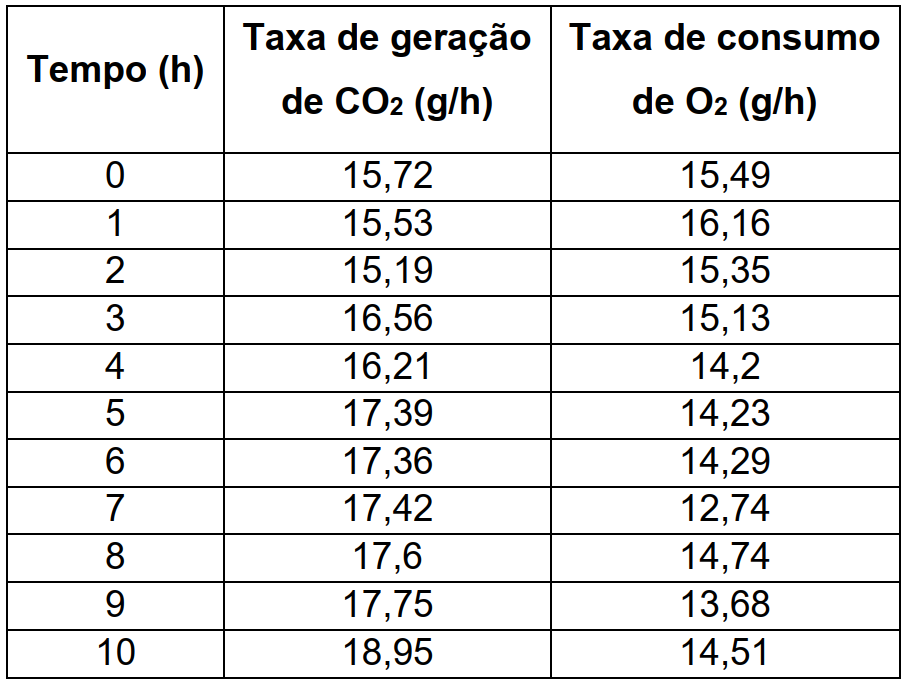

Os valores totais de $CO_{2}$ e $O_{2}$ são determinados pela integração no tempo dessas taxas. Uma variavel importante do processo, que permite avaliar a atividade metabólica do micro-organismo utilizado, é o chamado coeficiente respiratório que é a razão entre $CO_{2}$ total formado e o oxigênio total consumido.

Baseado nesta informações e nos valores tabelados calcule o valor deste coeficiente no período de 10 hotas de processo, utilizando:



1.   O método de trapézio
2.   O método de $\frac{1}{3}$ de Simpson.
3. A combinação dos métodos do trapézio, $\frac{1}{3}$ de Simpson e $\frac{3}{8}$ de Simpson. 



In [ ]:
#LETRA A
#MÉTODO DO TRAPÉZIO
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from numpy.polynomial import Polynomial as P
#tabela com os dados fornecidos
dados =   np.array([[0,15.72,15.49],
                    [1,15.53,16.16],
                    [2,15.19,15.35],
                    [3,16.56,15.13],
                    [4,16.21,14.20],
                    [5,17.39,14.23],
                    [6,17.36,14.29],
                    [7,17.42,12.74],
                    [8,17.6, 14.74],
                    [9,17.75,13.68],
                    [10,18.95,14.51]])
#coletando os pontos que queremos da tabela
tempo = dados[:,0]
carbono = dados[:,1]
oxigenio = dados[:,2]

#iniciando o metodo do trapezio REPETIDO
def trapezio(x,y):
  pontos = []
  for valor in range(len(x)): #laço   
    a = x[valor]    
    fa = y[valor]    
    if ((valor+1)==(len(x))): #condição de parada
      break
    b = x[valor+1]
    fb = y[valor+1]
    trap = (b-a)*(fb+fa)/2 #aplicando o metodo
    pontos.append(trap) #armazenando dados
    soma = 0
  for i in pontos:
    soma = soma + i  
  return soma

co2 = trapezio(tempo,carbono)
o2 = trapezio(tempo,oxigenio)
coeficiente_resp = co2/o2
print('O coeficiente respiratório pelo método de Trapézios repetidos é:',round(coeficiente_resp,4))

O coeficiente respiratório pelo método de Trapézios repetidos é: 1.1569


In [ ]:
#LETRA B
#MÉTODO 1/3 DE SIMPSON

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from numpy.polynomial import Polynomial as P
#Iniciando o metodo
def simpson13(x,y):
  n = len(x) #no caso é 11 
  a = x[0] #coletando os pontos necessarios
  b = x[-1]
  fa = y[0]
  fb = y[-1]  
  h = (b-a)/2
  if (n % 2 == 0): #condição para coletar o dado do centro
    esse = n/2
  else:
    esse = (n-1)/2    
  esse = int(esse)
  fx = y[esse] #valor respectivo
  trap = h*(fa+4*fx+fb)/3 #aplicando o metodo em si  
  return trap

carb =simpson13(tempo,carbono)
oxi = simpson13(tempo,oxigenio)
coefresp = carb/oxi
print(" O coeficiente respiratório pelo Método de Simpson 1/3 é:",round(coefresp,4))


 O coeficiente respiratório pelo Método de Simpson 1/3 é: 1.1991


In [ ]:
#LETRA C
#CONJUNTO DOS MÉTODOS DE TRAPÉZIO, 1/3 E 3/8 DE SIMPSON
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from numpy.polynomial import Polynomial as P

#MÉTODO DO TRAPEZIO REPETIDO
def simpson13R(x,y): 
  n = len(x)-1
  h = (x[-1] - x[0])/n
  pontos = []
  for i in range(0,(len(x)-2),2):
    a = x[i]    
    ab = x[i+1]    
    b = x[i+2]       
    fa = y[i]    
    fab = y[i+1]
    fb = y[i+2]    
    trap = h*(fa+4*fab+fb)/3    
    pontos.append(trap)
  pontos = np.array(pontos)
  soma = np.sum(pontos)
  return soma

#TRAPEZIO NORMAL
def trapezio_normal(x,y):
  #Estabelecendo paramêtros
  a  = x[0]
  b  = x[-1]
  fa = y[0]
  fb = y[-1]
  h = b-a
  f = (fa+fb)/2
  I = h*f
  return I

#SIMPSON 3/8 
def simpson3_8(x,y):
  n = len(x) #no caso é 11
  if (n % 2 == 0): #Em uma situação com numero total de dados par
    a = x[0]
    d = x[-1]
    aux = math.ceil(n/4) #arredondamento sempre para cima (.ceil)
    b =  x[0+aux]
    c =  x[0+2*aux]
    fa = y[0]
    fb = y[0+aux] 
    fc = y[0+2*aux]
    fd = y[-1]
    h = (d-a)/3
    simp = 3*h*(fa+3*fb+3*fc+fd)/8
  else: #Em uma situação com numero total de dados ímpar
    n = n - 1 #nao consideramos o último dado, de modo que tenhamos agora um numero par de pontos e impar de segmentos, e o metodo possa ser aplicado
    aux = math.ceil(n/4)
    a = x[0] 
    b = x[0+aux]
    c = x[0+2*aux]
    d = x[-2]   
    mx = x[-2:] 
    fa = y[0]
    fb = y[0+aux] 
    fc = y[0+2*aux]
    fd = y[-2]
    my = y[-2:]
    faltou = trapezio_normal(mx,my) #aplicando o método de trapezio normal com os ultimos pontos restantes que nao foram anteriormente incluidos na conta
    h = (d-a)/3
    simp = (3*h*(fa+3*fb+3*fc+fd)/8)+faltou
  return simp

#valores divididos para o tempo
S_38tem = tempo[:4]
S_13tem = tempo[4:7]
T_tem   = tempo[7:]
#Separando os dados a combinação dos métodos
S_38car = carbono[:4]
S_38oxi = oxigenio[:4]
S_13car = carbono[4:7]
S_13oxi = oxigenio[4:7]
T_car   = carbono[7:]
T_oxi   = oxigenio[7:]
Soma_carbono  = round(simpson3_8(S_38tem,S_38car),4) + round(simpson13R(S_13tem,S_13car),4) + round(trapezio(T_tem,T_car),4)
Soma_oxigenio = round(simpson3_8(S_38tem,S_38oxi),4) + round(simpson13R(S_13tem,S_13oxi),4) + round(trapezio(T_tem,T_oxi),4)

#prints finais
print("Resultado da combinação para carbono")
print(f'Usando o método de Simpson 3/8 de x0 até x4 temos:        {round(simpson3_8(S_38tem,S_38car),4)} g')
print(f'Usando o método de Simpson 1/3 de x5 até x7 temos:        {round(simpson13R(S_13tem,S_13car),4)} g')
print(f'Usando o método de Trapézio Repetido de x8 até x10 temos: {round(trapezio(T_tem,T_car),4)}g')
print(f'Somando todos métodos acima temos: {round(simpson3_8(S_38tem,S_38car),4)} + {round(simpson13R(S_13tem,S_13car),4)} + {round(trapezio(T_tem,T_car),4)} = {Soma_carbono}\n')

print("Resultado da combinação para oxigênio")
print(f'Usando o método de Simpson 3/8 de x0 até x4 temos        {round(simpson3_8(S_38tem,S_38oxi),4)} g')
print(f'Usando o método de Simpson 1/3 de x5 até x7 temos        {round(simpson13R(S_13tem,S_13oxi),4)} g')
print(f'Usando o método de Trapézio Repetido de x8 até x10 temos {round(trapezio(T_tem,T_oxi),4)} g\n')
print(f'Somando todos métodos acima temos: {round(simpson3_8(S_38tem,S_38oxi),4)} + {round(simpson13R(S_13tem,S_13oxi),4)} + {round(trapezio(T_tem,T_oxi),4)} = {(Soma_oxigenio)}')

print("\n","Coeficiente Respiratório final =",round((Soma_carbono/Soma_oxigenio),4))


Resultado da combinação para carbono
Usando o método de Simpson 3/8 de x0 até x4 temos:        46.665 g
Usando o método de Simpson 1/3 de x5 até x7 temos:        34.3767 g
Usando o método de Trapézio Repetido de x8 até x10 temos: 53.535g
Somando todos métodos acima temos: 46.665 + 34.3767 + 53.535 = 134.5767

Resultado da combinação para oxigênio
Usando o método de Simpson 3/8 de x0 até x4 temos        46.9313 g
Usando o método de Simpson 1/3 de x5 até x7 temos        28.47 g
Usando o método de Trapézio Repetido de x8 até x10 temos 42.045 g

Somando todos métodos acima temos: 46.9313 + 28.47 + 42.045 = 117.4463

 Coeficiente Respiratório final = 1.1459


# Questão 2

Em um trocador de calor de casco e tubo, vapor saturada é alimentado ao casco visando aquecer uma corrente de um fluido que escoa, de acordo a Figura a seguir:

[Colocar a imagem aqui]

O comprimento do trocador é obtido através da integração do balanço de energia do sistema dando origem a:

$l = \frac{W}{\pi D}\int_{Tentrada}^{Tsaída} [\frac{c_{p}(T)}{h(T)(T_{vapor}-T)}] dT$

Em que:

*  $L$: Comprimento do trocador;
*  $W$: Vazão mássica do fluido do tubo;
* $D$: Diâmetro do tubo;
* $T$: Temperatura;
* $c_{p}$: calor específico do fluido do tubo;
* $h$: coeficiente de transferência de calor entre o tubo e o casco;

O coeficente h é dado através da correlação empírica:

$h(T) = \frac{0,023  k(T)}{D}(\frac{4W}{\pi D \mu(T)})^{0,8}(\frac{\mu(T)c_{p}(T)}{k(T)})^{0,4}$

No qual:

* $k$: coeficiente de condutividade térimica do fluido do casco;
*$\mu$: viscosidade do fluido do casco

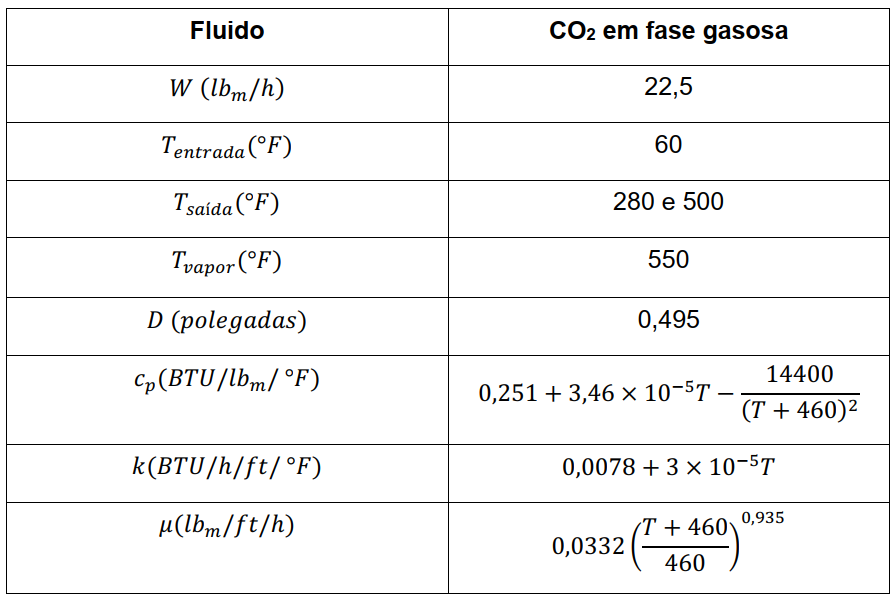

Calcule o comprimento do trocador para os casos apresentado a seguir

a) Utilize a aplicação múltipla da regra dos trapézio para $h = 1$.

b) Utilize a aplicação múltipla da regra $\frac{1}{3}$ de Simpson para $n = 110$.

In [ ]:
import math
import numpy as np

In [ ]:
# Dados
w = 22.5       #lbm/h
t_entrada = 60 #°F
t_saida1 = 280 #°F
t_saida2 = 500 #°F
t_vapor = 550  #°F
d = 0.495 #polegadas

def cp(t):#BTU/lbm/°F
  cp = 0.251 + 3.46*(10**(-5))*t - (14400)/((t+460)**2) 
  return cp
def k(t):#BTU/h/ft/°F
  k = 0.0078 + 3*(10**(-5))
  return k
def u(t): #lbm/ft/h
  y = 0.0332*(((t+460)/(460))**(0.935))
  return y

def h(t): #relação empirica para o coeficiente h(t)
  h = (0.023*(k(t)/d))*(4*w/((math.pi)*d*u(t)))**(0.8)*(u(t)*cp(t)/k(t))**(0.4)
  return h

def L(t):
  cte = w/(math.pi*d)
  multi = cp(t)/(h(t)*(t_vapor-t))
  L = cte*multi
  return L
#como a função precisa receber o numero de pontos, e nao de segmentos, é necessário somar +1 ao valor de n.
n1 = (t_saida1-t_entrada) + 1
n2 = (t_saida2 - t_entrada)+1
range1 = np.linspace(t_entrada,t_saida1,n1) #Número de pontos em que serão feitos os cálculos
range2 = np.linspace(t_entrada,t_saida2,n2)
comp = []

for i in range1:
  comp1 = L(i)
  comp.append(comp1)
comp = np.array(comp)

comp2 = []
for i in range2:
  compa = L(i)
  comp2.append(compa)
comp2 = np.array(comp2)


L_1 = trapezio(range1,comp)
print(f'O comprimento para a temperatura final de {t_saida1} °F é {round(L_1,4)} ft')
L_2 = trapezio(range2,comp2)
print("O comprimento para a temperatura final de {0} °F é {1} ft".format(t_saida2,round(L_2,4)))


O comprimento para a temperatura final de 280 °F é 15.5306 ft
O comprimento para a temperatura final de 500 °F é 68.3536 ft


In [ ]:
#LETRA B
# Método Simpson 1/3 REPETIDO

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from numpy.polynomial import Polynomial as P

#definindo a função
def simpson13R(x,y,h=1):
  pontos = []
  for i in range(0,(len(x)-2),2):  #de 2 em 2, indo até o último
    a = x[i]    #inicial
    ab = x[i+1]    #intermediario
    b = x[i+2]       #final
    fa = y[i]    
    fab = y[i+1]
    fb = y[i+2]    
    trap = h*(fa+4*fab+fb)/3    
    pontos.append(trap)
  pontos = np.array(pontos)
  soma = np.sum(pontos)    
  return soma

#valor de h respectivo para cada range de temperaturas
h1= int((t_saida1-t_entrada)/110)
h2 = int((t_saida2 - t_entrada)/110)
n = 110 + 1
# vamos fazer um range de dados das temperaturas para usar na função
range1 = np.linspace(t_entrada,t_saida1,n) #como a função precisa receber o numero de pontos, e nao de segmentos, é necessário somar +1 ao valor de n.
range2 = np.linspace(t_entrada,t_saida2,n) 
#armazenando os valores de comprimento para cada range
comp = []
for i in range1:
  comp1 = L(i)
  comp.append(comp1)
comp = np.array(comp)
#valores de comprimento para o range 2
comp2 = []
for i in range2:
  compa = L(i)
  comp2.append(compa)
comp2 = np.array(comp2)

#print final
comprimento1 = simpson13R(range1,comp,h1)
print(f'O comprimento para a temperatura final de {t_saida1} °F é {round(comprimento1,4)} ft')
comprimento2 = simpson13R(range2,comp2,h2)
print("O comprimento para a temperatura final de {0} °F é {1} ft".format(t_saida2,(round(comprimento2,4))))



O comprimento para a temperatura final de 280 °F é 15.5306 ft
O comprimento para a temperatura final de 500 °F é 68.3525 ft
